In [1]:
#Exercise 7.2
#Name: Harsimar Mangat

Corr 0.06883397035410908
SpearmanCorr 0.09461004109658226


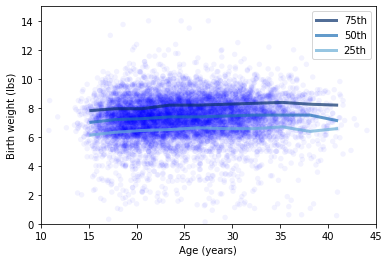

In [2]:

from __future__ import print_function, division
import first
%matplotlib inline
import numpy as np
import thinkstats2
import thinkplot
import pandas as pd



def BinnedPercentiles(df):
    """Bin the data by age and plot percentiles of weight for each bin.

    df: DataFrame
    """
    bins = np.arange(10, 48, 3)
    indices = np.digitize(df.agepreg, bins)
    groups = df.groupby(indices)

    ages = [group.agepreg.mean() for i, group in groups][1:-1]
    cdfs = [thinkstats2.Cdf(group.totalwgt_lb) for i, group in groups][1:-1]

    thinkplot.PrePlot(3)
    for percent in [75, 50, 25]:
        weights = [cdf.Percentile(percent) for cdf in cdfs]
        label = '%dth' % percent
        thinkplot.Plot(ages, weights, label=label)

    thinkplot.Config(xlabel="Mother's age (years)",
                     ylabel='Birth weight (lbs)',
                     xlim=[14, 45], legend=True)

def ScatterPlot(ages, weights, alpha=1.0, s=20):
    """Make a scatter plot and save it.

    ages: sequence of float
    weights: sequence of float
    alpha: float
    """
    thinkplot.Scatter(ages, weights, alpha=alpha)
    thinkplot.Config(xlabel='Age (years)',
                     ylabel='Birth weight (lbs)',
                     xlim=[10, 45],
                     ylim=[0, 15],
                     legend=False)  

def Corr(xs, ys):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    meanx, varx = thinkstats2.MeanVar(xs)
    meany, vary = thinkstats2.MeanVar(ys)

    corr = Cov(xs, ys, meanx, meany) / np.sqrt(varx * vary)
    return corr
    
def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov

def SpearmanCorr(xs, ys):
    xranks = pd.Series(xs).rank()
    yranks = pd.Series(ys).rank()
    return Corr(xranks, yranks)

live, firsts, others = first.MakeFrames()
live = live.dropna(subset=['agepreg', 'totalwgt_lb'])

ages = live.agepreg
weights = live.totalwgt_lb

print('Corr', Corr(ages, weights))
print('SpearmanCorr', SpearmanCorr(ages, weights))
#The pearson corelation is .06883
#The spearmans correlation is .0947
BinnedPercentiles(live)
#Scatter plot of birth weight vs mohers age
ScatterPlot(ages, weights, alpha=0.05, s=10)

#How would we characterize the relationship between variables?
#Correlation: 0.068833
#SpearmanCorr: 0.09461
#1 The scatter plot shows a weak/not significant relationship between the variables. 
#2 Looking at the correlation metrics/if we look at pearsons correlation, we see a positive value which 
#indicates a positive relationship and since the value is near 0, this could indicate a non-linear relationship
#The scatterplot shows a weak linear relationship
#Looking at spearmans correlation, our value is .09, which is relatively close to the pearson correlation
#this means the skewness in the distribution explains most o fthe difference between pearsons and spearmans correlation



In [3]:
#Exercise 8-1
from __future__ import print_function, division
import random
import first
%matplotlib inline
import numpy as np
import thinkstats2
import thinkplot
import pandas as pd

def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

def Estimate4(n=5, iters=100000):
    """Mean error for xbar and median as estimators of population mean.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)
    print('Experiment 1, sample size of 5 and 100000 iterations')
    print('mean error xbar', MeanError(means, mu))
    print('mean error median', MeanError(medians, mu))

Estimate4()


def Estimate5(n=5, iters=100000):
    """RMSE for biased and unbiased estimators of population variance.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('Experiment 2, sample size 5 and 1000000 iterations')
    print('RMSE biased', RMSE(estimates1, sigma**2))
    print('RMSE unbiased', RMSE(estimates2, sigma**2))

Estimate5()

# Since both xbar and median have a lower mean error, neither one is biased, as the iterations increase.


# yes, the biased estimator produces a lower RMSE 
#RMSE Biased is .59, which means we expect to be off by 0.58 on average 
#RMSE unbiased is .70, which means we expect to be off by 0.70 on average


Experiment 1, sample size of 5 and 100000 iterations
mean error xbar 0.001472175746622501
mean error median 0.002589244369703829
Experiment 2, sample size 5 and 1000000 iterations
RMSE biased 0.5981415593148177
RMSE unbiased 0.7040344926984524


standard error 0.8135272535859016
confidence interval (1.266179902628222, 3.663342416811716)


0.8135272535859016

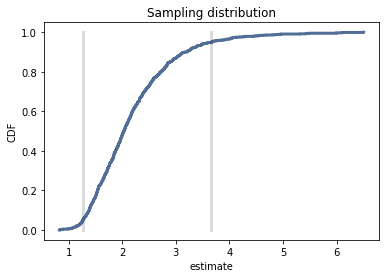

In [4]:
#Exercise 8.2
def SimulateSample(lam=2, n=10, iters=1000):
    """Sampling distribution of L as an estimator of exponential parameter.

    lam: parameter of an exponential distribution
    n: sample size
    iters: number of iterations
    """
    def VertLine(x, y=1):
        thinkplot.Plot([x, x], [0, y], color='0.8', linewidth=3)

    estimates = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        lamhat = 1.0 / np.mean(xs)
        estimates.append(lamhat)

    stderr = RMSE(estimates, lam)
    print('standard error', stderr)

    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.Percentile(5), cdf.Percentile(95)
    print('confidence interval', ci)
    VertLine(ci[0])
    VertLine(ci[1])

    # plot the CDF
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='est',
                     ylabel='CDF',
                     title='Samp distribution')

    return stderr

SimulateSample()

# SE is .813
# 90% CI is (1.266,3.3.6633)
# As sample size increases, our SE and CI shrinks